## Flowchart

## Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os

# Functions and classes for loading and using the Inception model.
import inception

# We use Pretty Tensor to define the new classifier.
import prettytensor as pt

In [7]:
!pip install prettytensor

This was developed using Python 3.5.2 (Anaconda) and TensorFlow version:

In [4]:
tf.__version__

'1.8.0'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os

# Functions and classes for loading and using the Inception model.
import inception

# We use Pretty Tensor to define the new classifier.
import prettytensor as pt

PrettyTensor version:

In [8]:
pt.__version__

'0.7.4'

In [10]:
!ls

datalab


## Load Data for CIFAR-10 

In [0]:
import cifar10

In [13]:
!wget https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/cifar10.py
!ls

--2018-06-06 16:05:42--  https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/cifar10.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7066 (6.9K) [text/plain]
Saving to: ‘cifar10.py’

cifar10.py          100%[===================>]   6.90K  --.-KB/s    in 0s      

2018-06-06 16:05:42 (78.6 MB/s) - ‘cifar10.py’ saved [7066/7066]

cifar10.py  datalab


In [14]:
!wget https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/download.py
!ls

--2018-06-06 16:05:52--  https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/download.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3161 (3.1K) [text/plain]
Saving to: ‘download.py’

download.py         100%[===================>]   3.09K  --.-KB/s    in 0s      

2018-06-06 16:05:52 (46.2 MB/s) - ‘download.py’ saved [3161/3161]

cifar10.py  datalab  download.py


In [0]:
import cifar10

In [0]:
! pip install urllib3 

In [0]:
# Changed to Python 3
!ls

cifar10.py  cifar10.py.1  cifar10.pyc  datalab	download.py  download.pyc


In [0]:
import cifar10

ModuleNotFoundError: ignored

In [16]:
!wget https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/dataset.py
!ls

--2018-06-06 16:06:14--  https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12156 (12K) [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]  11.87K  --.-KB/s    in 0.001s  

2018-06-06 16:06:14 (22.2 MB/s) - ‘dataset.py’ saved [12156/12156]

cifar10.py  datalab  dataset.py  download.py  __pycache__


In [18]:
!wget https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/cache.py
!ls

--2018-06-06 16:06:27--  https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/cache.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4764 (4.7K) [text/plain]
Saving to: ‘cache.py’

cache.py            100%[===================>]   4.65K  --.-KB/s    in 0s      

2018-06-06 16:06:28 (23.0 MB/s) - ‘cache.py’ saved [4764/4764]

cache.py  cifar10.py  datalab  dataset.py  download.py	__pycache__


In [0]:
import cifar10

## Arre waah!..chal gya.. {-----*Itni khushi!! :') :')' *-----}

In [20]:
!mkdir data_cifar
!ls

cache.py  cifar10.py  data_cifar  datalab  dataset.py  download.py  __pycache__


In [0]:
from cifar10 import num_classes

Set the path for storing the data-set on your computer.

In [0]:
cifar10.data_path = "data_cifar/"

The CIFAR-10 data-set is about 163 MB and will be downloaded automatically if it is not located in the given path.

In [12]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


Load the class-names.

In [13]:
class_names = cifar10.load_class_names()
class_names

Loading data: data_cifar/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Load the training-set. This returns the images, the class-numbers as integers, and the class-numbers as One-Hot encoded arrays called labels.

In [14]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: data_cifar/cifar-10-batches-py/data_batch_1
Loading data: data_cifar/cifar-10-batches-py/data_batch_2
Loading data: data_cifar/cifar-10-batches-py/data_batch_3
Loading data: data_cifar/cifar-10-batches-py/data_batch_4
Loading data: data_cifar/cifar-10-batches-py/data_batch_5


Load the test-set.

In [15]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data_cifar/cifar-10-batches-py/test_batch


The CIFAR-10 data-set has now been loaded and consists of 60,000 images and associated labels (i.e. classifications of the images). The data-set is split into 2 mutually exclusive sub-sets, the training-set and the test-set.

In [16]:

print("Size of:")
print("- Training-set:\t\t{}".format(len(images_train)))
print("- Test-set:\t\t{}".format(len(images_test)))

Size of:
- Training-set:		50000
- Test-set:		10000


### Helper-function for plotting images

Function used to plot at most 9 images in a 3x3 grid, and writing the true and predicted classes below each image.

In [0]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Plot a few images to see if data is correct

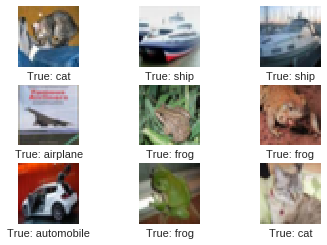

In [18]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

## Download the Inception Model

The Inception model is downloaded from the internet. This is the default directory where you want to save the data-files. The directory will be created if it does not exist.

In [0]:
inception.data_dir = 'inception/'

Download the data for the Inception model if it doesn't already exist in the directory. It is 85 MB.

---

In [20]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [22]:
!wget https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/inception.py

--2018-06-06 18:18:19--  https://raw.githubusercontent.com/Hvass-Labs/TensorFlow-Tutorials/master/inception.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22187 (22K) [text/plain]
Saving to: ‘inception.py.2’

inception.py.2      100%[===================>]  21.67K  --.-KB/s    in 0.008s  

2018-06-06 18:18:19 (2.81 MB/s) - ‘inception.py.2’ saved [22187/22187]



In [0]:
import inception

In [24]:
inception.maybe_download()
!ls

Data has apparently already been downloaded and unpacked.
cache.py    data_cifar	dataset.py   inception	   inception.py.1  __pycache__
cifar10.py  datalab	download.py  inception.py  inception.py.2


## Load the Inception Model

Load the Inception model so it is ready for classifying images.

Note the deprecation warning, which might cause the program to fail in the future.

In [0]:
model = inception.Inception()

## Calculate Transfer-Values

Import a helper-function for caching the transfer-values of the Inception model.

In [0]:
from inception import transfer_values_cache

Set the file-paths for the caches of the training-set and test-set.

In [0]:
file_path_cache_train = os.path.join(cifar10.data_path, 'inception_cifar10_train.pkl')
file_path_cache_test = os.path.join(cifar10.data_path, 'inception_cifar10_test.pkl')

In [28]:
print("Processing Inception transfer-values for training-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_train * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=images_scaled,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Processing image:  50000 / 50000


- Data saved to cache-file: data_cifar/inception_cifar10_train.pkl


## Woooooohh.. That took like an hour!

In [29]:
import datetime

datetime.date.today()

datetime.date(2018, 6, 6)

In [30]:
import time
tic=time.time()
print("Processing Inception transfer-values for test-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_test * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=images_scaled,
                                             model=model)
toc=time.time()



Processing Inception transfer-values for test-images ...
- Processing image:  10000 / 10000


- Data saved to cache-file: data_cifar/inception_cifar10_test.pkl


TypeError: ignored

In [34]:
print("Wooh... That took...... ",(toc-tic)," Seconds... i.e. ",(toc-tic)/60," minutes" )
print(datetime.date.today())

Wooh... That took......  679.1845524311066  Seconds... i.e.  11.319742540518442  minutes
2018-06-06
